In [1]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
import pickle
import nltk.classify.util
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def extract(words):
    return dict([(word, True) for word in words])


negative_ids = movie_reviews.fileids('neg')
positive_ids = movie_reviews.fileids('pos')


negative_features = [(extract(movie_reviews.words(fileids=[f])), 'neg') for f in negative_ids]
positive_features = [(extract(movie_reviews.words(fileids=[f])), 'pos') for f in positive_ids]


negative_cutoff = int(len(negative_features) * 99/100)
positive_cutoff = int(len(positive_features) * 45/50)

train_features = negative_features[:negative_cutoff] + positive_features[:positive_cutoff]
test_features = negative_features[negative_cutoff:] + positive_features[positive_cutoff:]

print('Training on %d instances, testing on %d instances' % (len(train_features), len(test_features)))
classifier = NaiveBayesClassifier.train(train_features)
print('Training complete')
print('accuracy:', nltk.classify.util.accuracy(classifier, test_features)*100,'%')
classifier.show_most_informative_features()


f = open('classifier.pickle', 'wb')
pickle.dump(classifier, f)
f.close()


Training on 1890 instances, testing on 110 instances
Training complete
accuracy: 92.72727272727272 %
Most Informative Features
               ludicrous = True              neg : pos    =     14.0 : 1.0
              astounding = True              pos : neg    =     13.6 : 1.0
                  avoids = True              pos : neg    =     13.6 : 1.0
                 idiotic = True              neg : pos    =     12.2 : 1.0
             fascination = True              pos : neg    =     12.1 : 1.0
             outstanding = True              pos : neg    =     10.9 : 1.0
                  annual = True              pos : neg    =     10.6 : 1.0
               atrocious = True              neg : pos    =     10.6 : 1.0
               addresses = True              pos : neg    =      9.9 : 1.0
                  hatred = True              pos : neg    =      9.9 : 1.0


In [2]:

f = open('classifier.pickle', 'rb')
classifier = pickle.load(f)
f.close()



sentence="i do not love you go and try out another girl fuck you"
features = extract(sentence)
print(classifier.classify(features))

sentence="i love you  meet me again"
features = extract(sentence)
print(classifier.classify(features))


sentence="i am not saying that i don't love you"
features = extract(sentence)
print(classifier.classify(features))


neg
pos
pos


In [3]:
opinion={}

f=open('r.txt','r')
pos,neg=0,0
for line in f:
    chat=line.split('-')[1].split(':')[1]
    name=line.split('-')[1].split(':')[0]
    print(name,chat)
    if opinion.get(name,None) is None:
        opinion[name]=[0,0]
    res=classifier.classify(extract(chat))
    if res=='pos':
        pos+=1
        opinion[name][0]+=1
    else:
        neg+=1
        opinion[name][1]+=1
print(pos,neg)

 Baba  You should not go to Lucknow

 Mom  You have to take class so don't go there

 Ankit  There are NPTEL exam on 15 november and when will you study

 Badal  Don't  be foolish bro just go and participate

 DJ  Wow just go participate in Hackathon for better experience

 Brother  This is opportunity just go

 Sister  Go and try to explore yourself you will meet to great people

 Dad  so when are you going? 

 Mom  so when are you going i will prepare food for you.

6 3


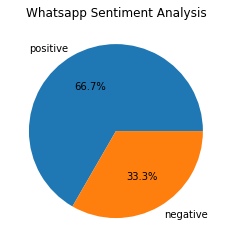

In [4]:
neg=abs(neg)
labels = ['positive','negative']
sizes = [pos,neg]
fig1, ax1 = plt.subplots()
ax1.pie(sizes ,labels=labels, autopct='%1.1f%%')
plt.title('Whatsapp Sentiment Analysis')
plt.show()

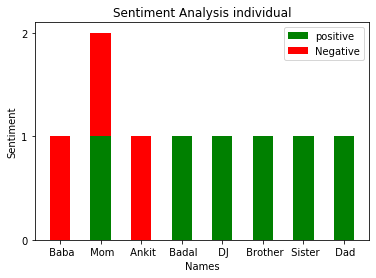

In [5]:
names,positive,negative=[],[],[]
for name in opinion:
    names.append(name)
    positive.append(opinion[name][0])
    negative.append(opinion[name][1])
    
ind = np.arange(len(names))
width=0.5
max_x=max(positive)+max(negative)+1

p1 = plt.bar(ind, positive, width,color='g')
p2 = plt.bar(ind, negative, width, bottom=positive,color='r')




plt.xlabel('Names')
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis individual')

plt.xticks(ind, names)
plt.yticks(np.arange(0,max_x,1))
plt.legend((p1[0], p2[0]), ('positive', 'Negative'))


plt.show()